**D3APL: Aplicações em Ciência de Dados** <br/>
IFSP Campinas

Prof. Dr. Samuel Martins (Samuka) <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

# Multilayer Perceptron (MLP) with Scikit-learn

## 1. Set up

#### 1.1 Imports

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### 1.2 Loading MNIST Dataset
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [2]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

#### **images vs data**

<b>data{ndarray, dataframe} of shape (1797, 64)</b> <br/>
&nbsp;&nbsp;&nbsp;&nbsp; The flattened data matrix. If as_frame=True, data will be a pandas DataFrame.

The image's pixels are flattened into a **feature vector (1D array)**.


<b>images: {ndarray} of shape (1797, 8, 8)</b> <br/>
&nbsp;&nbsp;&nbsp;&nbsp; The raw image data.

Original image resolution.

#### **Displaying some images**

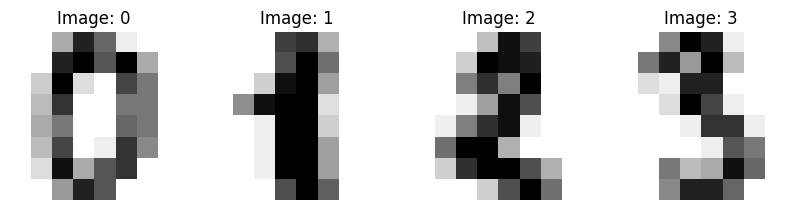

In [3]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Image: %i" % label)

#### 1.3 Getting the data and labels

In [4]:
X = digits['data']
y = digits['target']

print(f'X.shape = {X.shape}')
print(f'y.shape = {y.shape}')

X.shape = (1797, 64)
y.shape = (1797,)


#### 1.4 Splitting data into train and test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print('# Training set')
print(f'X_train.shape = {X_train.shape}')
print(f'y_train.shape = {y_train.shape}\n')

print('# Testing set')
print(f'X_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

# Training set
X_train.shape = (1437, 64)
y_train.shape = (1437,)

# Testing set
X_test.shape = (360, 64)
y_test.shape = (360,)


#### 1.5 Feature scaling

In [8]:
X.min(), X.max()

(0.0, 16.0)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train.min(), X_train.max()

(-2.9998022720318125, 37.89459064299289)

## 2. Training MLP
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

### 2.1 Imports

In [11]:
from sklearn.neural_network import MLPClassifier

### 2.2 Training

In [12]:
# MLP with 2 hidden layers, each with 16 neurons
mlp = MLPClassifier(hidden_layer_sizes=(16, 16), solver='sgd', max_iter=1000)

In [13]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=1000, solver='sgd')

### 2.3 Getting the number of layers

In [14]:
mlp.hidden_layer_sizes

(16, 16)

In [15]:
print(f'Number of layers: {mlp.n_layers_}')
print(f'Number of hidden layers: {len(mlp.hidden_layer_sizes)}')

Number of layers: 4
Number of hidden layers: 2


### 2.4 Info

#### **Number of neurons in the hidden layers**

In [16]:
print(f'Number of neurons in the hidden layers: {mlp.hidden_layer_sizes}')

Number of neurons in the hidden layers: (16, 16)


#### **Number of neurons in the output layer**

In [17]:
print(f'Number of neurons in the output layers: {mlp.n_outputs_}')

Number of neurons in the output layers: 10


#### **Learned weights of each layer**

In [19]:
# one matrix per layer except the input layer
print(len(mlp.coefs_))

3


In [20]:
# weights of Layer 2 (hidden layer)
print(f'Layer 2 Weight Matrix: {mlp.coefs_[0].shape}')


Layer 2 Weight Matrix: (64, 16)


In [21]:
# weights of Layer 3 (hidden layer)
print(f'Layer 3 Weight Matrix: {mlp.coefs_[1].shape}')


Layer 3 Weight Matrix: (16, 16)


In [22]:
# weights of Layer 4 (output layer)
print(f'Layer 4 Weight Matrix: {mlp.coefs_[2].shape}')


Layer 4 Weight Matrix: (16, 10)


#### **Biases of each layer**

In [24]:
# one array per layer except the input layer
len(mlp.intercepts_)

3

In [26]:
# biases of Layer 2 (hidden layer)
print(f'Layer 2 Biases: {mlp.intercepts_[0].shape}')


Layer 2 Biases: (16,)


In [28]:
# biases of Layer 3 (hidden layer)
print(f'Layer 3 Biases: {mlp.intercepts_[1].shape}')


Layer 3 Biases: (16,)


In [29]:
# biases of Layer 4 (output layer)
print(f'Layer 4 Biases: {mlp.intercepts_[2].shape}')


Layer 4 Biases: (10,)


## 3. Experiments

### 3.1 Predictions

In [30]:
y_test_pred = mlp.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.97      1.00      0.98        28
           2       1.00      0.94      0.97        33
           3       0.92      0.97      0.94        34
           4       0.98      1.00      0.99        46
           5       0.91      0.89      0.90        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.90      0.93      0.91        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### 3.2 Visualizing Errors

In [33]:
test_errors_mask = y_test != y_test_pred

In [34]:
test_errors_indices = np.argwhere(test_errors_mask)
test_errors_indices

array([[  9],
       [ 52],
       [ 60],
       [ 71],
       [ 97],
       [133],
       [149],
       [159],
       [193],
       [234],
       [239],
       [244],
       [245],
       [249],
       [269],
       [339]])

In [35]:
test_errors_indices = test_errors_indices.ravel()
test_errors_indices

array([  9,  52,  60,  71,  97, 133, 149, 159, 193, 234, 239, 244, 245,
       249, 269, 339])

In [39]:
print(f'Number of misclassified test image: {test_errors_indices.size}')

Number of misclassified test image: 16


In [43]:
scaler.inverse_transform

<bound method StandardScaler.inverse_transform of StandardScaler()>

In [46]:
img_idx = 71

img_error = X_test[img_idx]

# inverting normalization
img_error = scaler.inverse_transform([img_error])

# image resolution: 8 x 8
img_error = np.reshape(img_error, (8, 8))


Text(0.5, 1.0, 'Test Image 71 - True: 5, Predicted: 9')

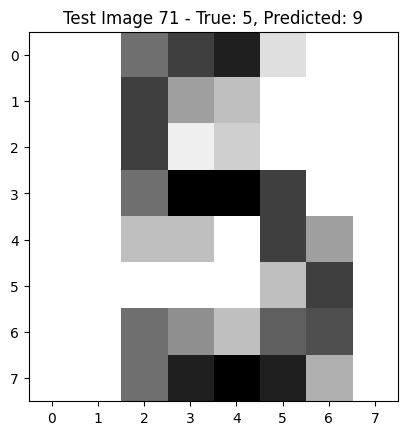

In [47]:
plt.imshow(img_error, cmap=plt.cm.gray_r, interpolation="nearest")
plt.title(f'Test Image {img_idx} - True: {y_test[img_idx]}, Predicted: {y_test_pred[img_idx]}')